In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
all_births = pd.read_csv('../data/births_combined.csv')

In [8]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [16]:
all_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7670 non-null   int64
 1   month          7670 non-null   int64
 2   date_of_month  7670 non-null   int64
 3   day_of_week    7670 non-null   int64
 4   births         7670 non-null   int64
dtypes: int64(5)
memory usage: 299.7 KB


In [32]:
#converting column from int64 to string in order to replace numerical values of days of the week into text values.
all_births['day_of_week'] = all_births['day_of_week'].astype(str)
all_births['month'] = all_births['month'].astype(str)

In [18]:
all_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           7670 non-null   int64 
 1   month          7670 non-null   int64 
 2   date_of_month  7670 non-null   int64 
 3   day_of_week    7670 non-null   object
 4   births         7670 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 299.7+ KB


In [19]:
#replacing values
replaced_days = {
    "1": "Monday",
    "2": "Tuesday",
    "3": "Wednesday",
    "4": "Thursday",
    "5": "Friday",
    "6": "Saturday",
    "7": "Sunday"
}

In [20]:
all_births['day_of_week'] = all_births['day_of_week'].replace(replaced_days)

In [22]:
all_births.head(20)

,year,month,date_of_month,day_of_week,births
0,1994,1,1,Saturday,8096
1,1994,1,2,Sunday,7772
2,1994,1,3,Monday,10142
3,1994,1,4,Tuesday,11248
4,1994,1,5,Wednesday,11053
5,1994,1,6,Thursday,11406
6,1994,1,7,Friday,11251
7,1994,1,8,Saturday,8653
8,1994,1,9,Sunday,7910
9,1994,1,10,Monday,10498


In [43]:
avg_births_day = all_births.groupby('day_of_week')['births'].mean().reset_index()

In [49]:
avg_births_day.sort_values(by='births', ascending=False)

,day_of_week,births
5,Tuesday,12841.802920
6,Wednesday,12620.875000
4,Thursday,12551.800913
0,Friday,12349.235616
1,Monday,11606.728102
2,Saturday,8621.960766
3,Sunday,7635.369526


In [53]:
avg_births_day_sorted = avg_births_day.sort_values(by='births', ascending=False)

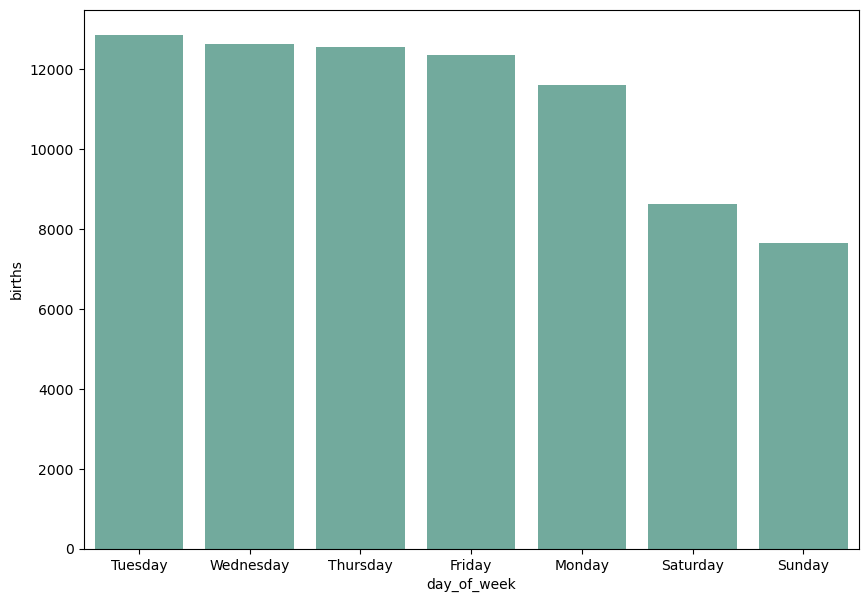

In [54]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_day_sorted,
    x="day_of_week", 
    y="births",  
    color='#69b3a2');

In [33]:
replaced_months = {
    "1": "January",
    "2": "February",
    "3": "March",
    "4": "April",
    "5": "May",
    "6": "June",
    "7": "July",
    "8": "August",
    "9": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

In [34]:
all_births['month'] = all_births['month'].replace(replaced_months)

In [35]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053


In [36]:
avg_births_month = all_births.groupby('month')['births'].mean().reset_index()

In [50]:
avg_births_month.sort_values(by='births', ascending=False)

,month,births
11,September,11810.569841
1,August,11712.175115
5,July,11562.648233
6,June,11305.692063
10,October,11204.027650
8,May,11022.069124
2,December,10990.938556
3,February,10980.939292
7,March,10979.059908
9,November,10927.258730


In [51]:
avg_births_month_sorted = avg_births_month.sort_values(by='births', ascending=False)

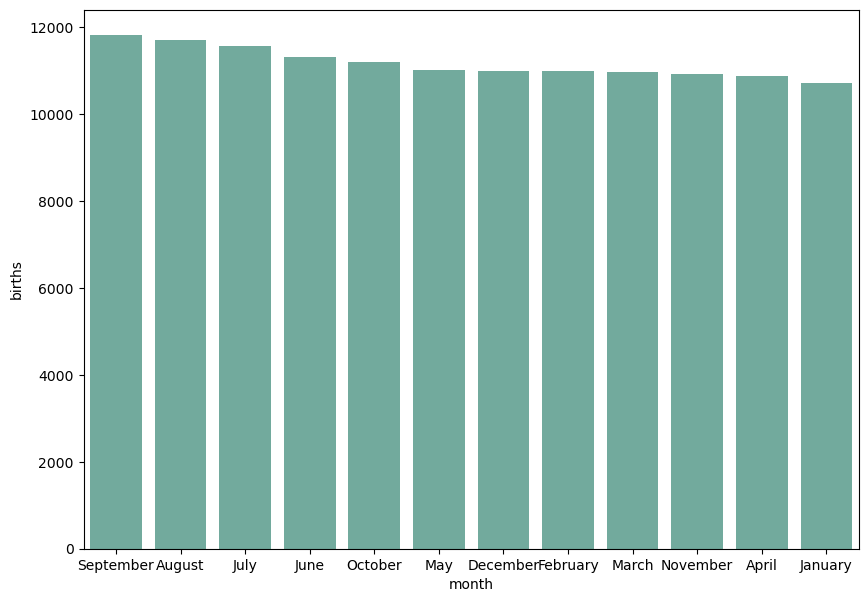

In [52]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_month_sorted,
    x="month", 
    y="births",  
    color='#69b3a2');

In [55]:
september_births = all_births[all_births['month'] == 'September']

In [59]:
september_births.sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
4644,2006,September,19,Tuesday,15205
...,...,...,...,...,...
5727,2009,September,6,Sunday,7587
6091,2010,September,5,Sunday,7586
6112,2010,September,26,Sunday,7543
6462,2011,September,11,Sunday,7501


In [80]:
all_births[all_births['month']=='September'].nlargest(1, 'births')['month'].tolist()[0]

'September'

In [73]:
highest_births = all_births[all_births['month']=='September'].nlargest(1, 'births')['month'].tolist()[0]

In [79]:
all_births[all_births['month']==highest_births].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
4644,2006,September,19,Tuesday,15205
...,...,...,...,...,...
5727,2009,September,6,Sunday,7587
6091,2010,September,5,Sunday,7586
6112,2010,September,26,Sunday,7543
6462,2011,September,11,Sunday,7501


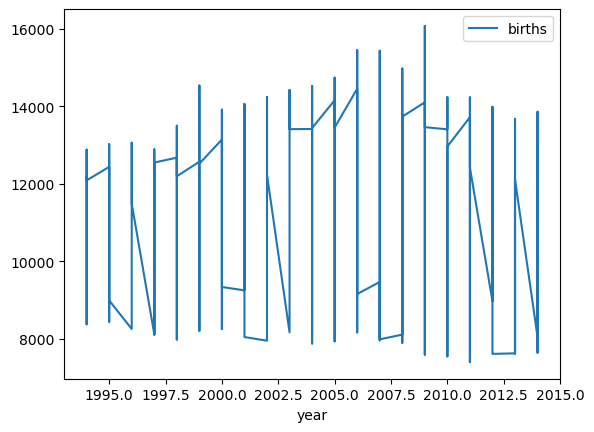

In [84]:
all_births[all_births['month']==highest_births].plot(x='year',y='births',
                                           kind='line');